In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# The tech stocks we'll use
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [4]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-04-27,2444.879883,2363.000000,2443.199951,2376.000000,5645600.0,2376.000000,AMAZON
2020-04-28,2373.500000,2306.000000,2372.100098,2314.080078,5269400.0,2314.080078,AMAZON
2020-04-29,2391.889893,2310.000000,2330.010010,2372.709961,4591600.0,2372.709961,AMAZON
2020-04-30,2475.000000,2396.010010,2419.840088,2474.000000,9534600.0,2474.000000,AMAZON
2020-05-01,2362.439941,2258.189941,2336.800049,2286.040039,9772600.0,2286.040039,AMAZON
2020-05-04,2326.979980,2256.379883,2256.379883,2315.989990,4865900.0,2315.989990,AMAZON
2020-05-05,2351.000000,2307.129883,2340.000000,2317.800049,3242500.0,2317.800049,AMAZON
2020-05-06,2357.449951,2320.000000,2329.439941,2351.260010,3117800.0,2351.260010,AMAZON
2020-05-07,2376.000000,2343.110107,2374.780029,2367.610107,3396400.0,2367.610107,AMAZON


In [5]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,167.718149,164.569738,166.062685,166.228920,3.523320e+07,161.091911
std,56.056083,54.599288,55.198029,55.420158,1.732226e+07,57.266725
min,91.669998,89.470001,90.000000,90.339996,1.136200e+07,84.962914
25%,117.410000,115.614998,116.494999,116.355003,2.372490e+07,109.506489
50%,160.710007,158.000000,159.289993,159.539993,3.098350e+07,153.816269
75%,199.865005,196.275002,198.484993,198.514999,4.154925e+07,195.810036
max,327.850006,323.350006,324.739990,327.200012,1.622063e+08,326.316681


In [6]:
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,977.623231,960.038625,968.760671,969.229237,1.725353e+06,969.229237
std,233.932717,229.097428,231.225643,231.713457,8.656957e+05,231.713457
min,522.734009,515.179993,519.500000,516.830017,3.475000e+05,516.830017
25%,769.600006,755.799988,764.369995,762.500000,1.211300e+06,762.500000
50%,1024.000000,992.559998,1001.500000,1005.150024,1.489700e+06,1005.150024
75%,1160.340027,1139.090027,1147.330017,1152.190002,1.971700e+06,1152.190002
max,1532.105957,1521.400024,1525.069946,1526.689941,1.116490e+07,1526.689941


In [7]:
MSFT.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,90.516076,88.823352,89.699539,89.720493,2.967258e+07,87.048169
std,37.630376,36.688748,37.189319,37.189356,1.455021e+07,38.390967
min,42.590000,39.720001,40.450001,40.470001,7.425600e+06,36.970531
25%,57.240000,56.315001,56.690001,56.855001,2.067715e+07,53.230358
50%,83.430000,82.690002,83.099998,82.980003,2.588780e+07,79.952187
75%,113.049999,111.245003,112.080002,112.154999,3.362315e+07,110.266109
max,190.699997,186.470001,190.649994,188.699997,1.352271e+08,188.185989


In [8]:
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,1244.223995,1218.709039,1232.294933,1232.161557,4.315910e+06,1232.161557
std,546.380029,533.698777,540.284330,540.346365,2.227291e+06,540.346365
min,426.799988,418.359985,420.600006,421.709991,8.813000e+05,421.709991
25%,758.130005,745.265015,753.054993,751.589996,2.823650e+06,751.589996
50%,1125.410034,1108.770020,1109.150024,1120.660034,3.708900e+06,1120.660034
75%,1779.700012,1745.524963,1764.755005,1764.510010,5.089600e+06,1764.510010
max,2475.000000,2396.010010,2443.199951,2474.000000,2.190940e+07,2474.000000


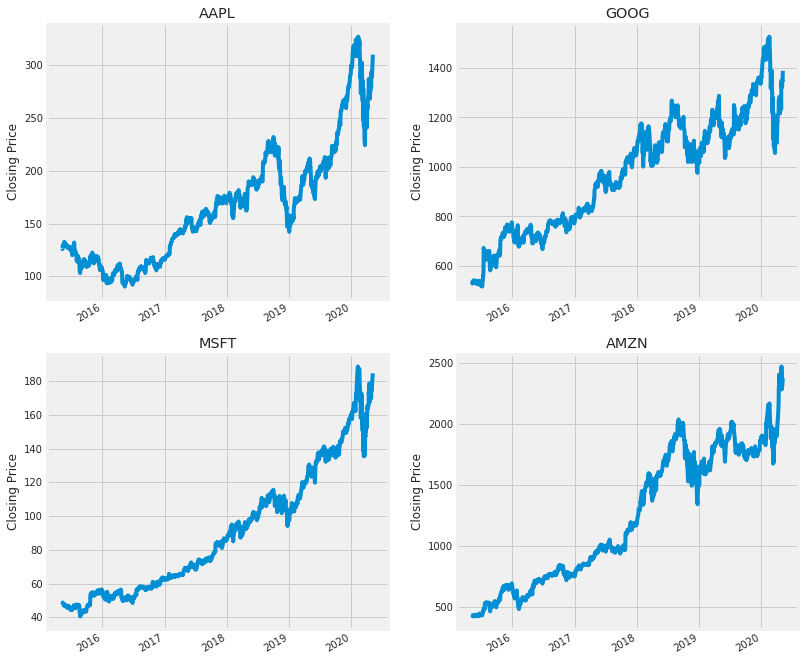

In [9]:
# historical view of closing price
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Closing Price')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

**AAPL PRICE**

In [13]:
## predict AAPL Price

data = AAPL.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .8 ))
training_data_len


1008

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_aapl = scaler.fit_transform(dataset)
scaled_aapl

array([[0.15190408],
       [0.15000424],
       [0.1505953 ],
       ...,
       [0.88782401],
       [0.90095406],
       [0.92793209]])

In [15]:
#create train data set
train_data = scaled_aapl[0:int(training_data_len), :]
aapl_x_train = []
aapl_y_train = []

for i in range(60, len(train_data)):
    aapl_x_train.append(train_data[i-60:i, 0])
    aapl_y_train.append(train_data[i, 0])
# Convert the x_train and y_train to numpy arrays 
aapl_x_train, aapl_y_train = np.array(aapl_x_train), np.array(aapl_y_train)
#Reshape the data
aapl_x_train = np.reshape(aapl_x_train, (aapl_x_train.shape[0], aapl_x_train.shape[1], 1))
print(aapl_x_train.shape, aapl_y_train.shape)


(948, 60, 1) (948,)


In [16]:
import re
import tensorflow as tf
from sklearn.preprocessing  import StandardScaler,MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [37]:
# RNN
regressor = Sequential()

# Adding a LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (aapl_x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80,activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, activation = 'relu'))
regressor.add(Dropout(0.2))
 
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(aapl_x_train, aapl_y_train, epochs = 5, batch_size = 6)

Epoch 1/5
948/948 [==============================] - 18s 19ms/step - loss: 0.0067
Epoch 2/5
948/948 [==============================] - 17s 18ms/step - loss: 0.0030
Epoch 3/5
948/948 [==============================] - 17s 18ms/step - loss: 0.0026
Epoch 4/5
948/948 [==============================] - 17s 18ms/step - loss: 0.0021
Epoch 5/5
948/948 [==============================] - 17s 18ms/step - loss: 0.0018


In [39]:
regressor.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 60, 60)            14880     
_________________________________________________________________
dropout_21 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 60, 60)            29040     
_________________________________________________________________
dropout_22 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_23 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 80)               

In [0]:
#create test data set
test_data = scaled_aapl[training_data_len - 60: , :]
#Create the data sets x_test and y_test
aapl_x_test = []
aapl_y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    aapl_x_test.append(test_data[i-60:i, 0])
# Convert the data to a numpy array
aapl_x_test = np.array(aapl_x_test)
aapl_x_test = np.reshape(aapl_x_test, (aapl_x_test.shape[0], aapl_x_test.shape[1], 1 ))
aapl_pred = regressor.predict(aapl_x_test)
aapl_pred = scaler.inverse_transform(aapl_pred)


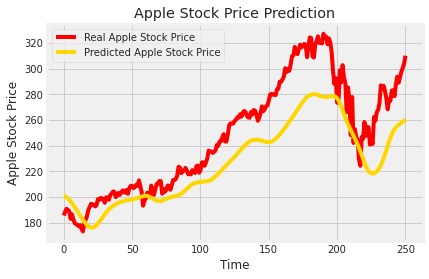

In [41]:
valid = data[training_data_len:]
real_price = valid.iloc[:, 0:1].values
plt.plot(real_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(aapl_pred, color = 'gold', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


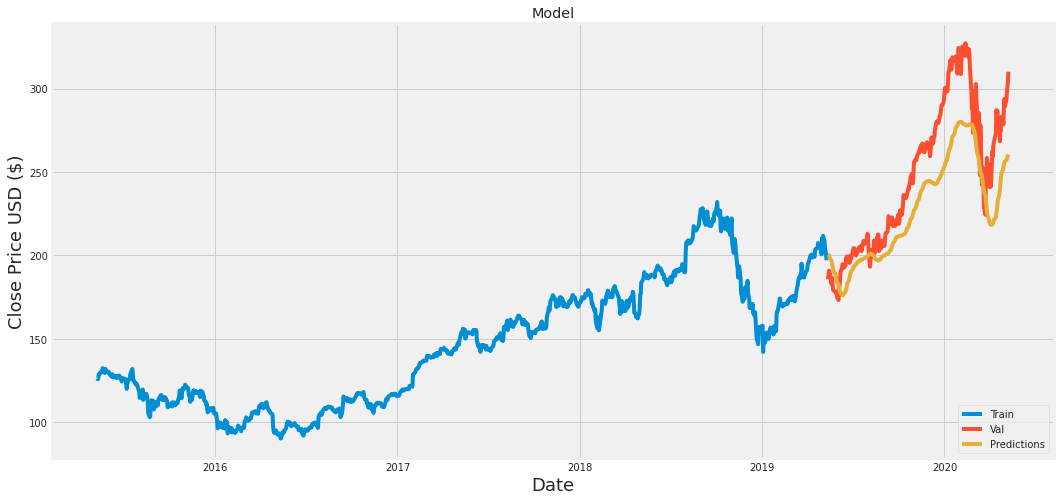

In [42]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = aapl_pred
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [43]:
valid

,Close,Predictions
Date,,
2019-05-13,185.720001,200.603989
2019-05-14,188.660004,200.400116
2019-05-15,190.919998,199.895432
2019-05-16,190.080002,199.095764
2019-05-17,189.000000,198.038223
...,...,...
2020-05-04,293.160004,257.155518
2020-05-05,297.559998,257.908295
2020-05-06,300.630005,258.679749


In [45]:
rmse_aapl = np.sqrt(np.mean(((aapl_pred- aapl_y_test) ** 2)))
rmse_aapl

26.503339698047025

**GOOG PRICE**

In [46]:
data = GOOG.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .8 ))
scaler = MinMaxScaler(feature_range=(0,1))
scaled_goog = scaler.fit_transform(dataset)
scaled_goog

array([[0.01868575],
       [0.01209075],
       [0.0126651 ],
       ...,
       [0.82236161],
       [0.84737499],
       [0.86303056]])

In [48]:
train_data = scaled_goog[0:int(training_data_len), :]
goog_x_train = []
goog_y_train = []

for i in range(60, len(train_data)):
    goog_x_train.append(train_data[i-60:i, 0])
    goog_y_train.append(train_data[i, 0])
# Convert the x_train and y_train to numpy arrays 
goog_x_train, goog_y_train = np.array(goog_x_train), np.array(goog_y_train)
#Reshape the data
goog_x_train = np.reshape(goog_x_train, (goog_x_train.shape[0], goog_x_train.shape[1], 1))
print(goog_x_train.shape, goog_y_train.shape)

(948, 60, 1) (948,)


In [52]:
# RNN
regressor = Sequential()

# Adding a LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (goog_x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80,activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, activation = 'relu'))
regressor.add(Dropout(0.2))
 
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(aapl_x_train, aapl_y_train, epochs = 5, batch_size = 6)

Epoch 1/5
948/948 [==============================] - 18s 19ms/step - loss: 0.0110
Epoch 2/5
948/948 [==============================] - 17s 18ms/step - loss: 0.0027
Epoch 3/5
948/948 [==============================] - 17s 18ms/step - loss: 0.0023
Epoch 4/5
948/948 [==============================] - 17s 18ms/step - loss: 0.0020
Epoch 5/5
948/948 [==============================] - 17s 18ms/step - loss: 0.0020


In [0]:
#create test data set
test_data = scaled_goog[training_data_len - 60: , :]
#Create the data sets x_test and y_test
goog_x_test = []
goog_y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    goog_x_test.append(test_data[i-60:i, 0])
# Convert the data to a numpy array
goog_x_test = np.array(goog_x_test)
goog_x_test = np.reshape(goog_x_test, (goog_x_test.shape[0], goog_x_test.shape[1], 1 ))
goog_pred = regressor.predict(goog_x_test)
goog_pred = scaler.inverse_transform(goog_pred)

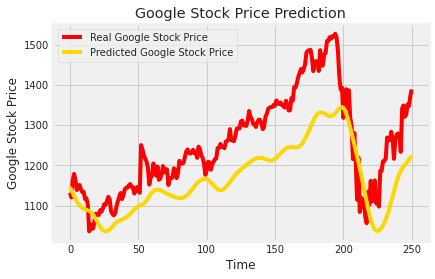

In [55]:
valid = data[training_data_len:]
real_price = valid.iloc[:, 0:1].values
plt.plot(real_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(goog_pred, color = 'gold', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


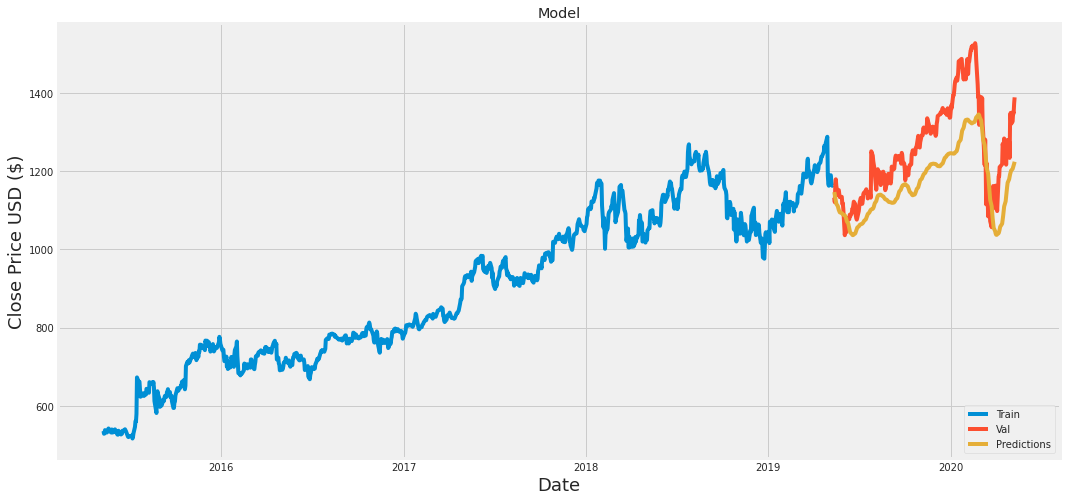

In [56]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = goog_pred
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [57]:
valid

,Close,Predictions
Date,,
2019-05-13,1132.030029,1146.415771
2019-05-14,1120.439941,1139.011597
2019-05-15,1164.209961,1131.290039
2019-05-16,1178.979980,1123.640747
2019-05-17,1162.300049,1116.556519
...,...,...
2020-05-04,1326.800049,1205.565430
2020-05-05,1351.109985,1209.753052
2020-05-06,1347.300049,1214.156128


In [58]:
rmse_goog = np.sqrt(np.mean(((goog_pred- goog_y_test) ** 2)))
rmse_goog

102.56184764449051

**Microsoft Price**

In [59]:
data = MSFT.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .8 ))
scaler = MinMaxScaler(feature_range=(0,1))
scaled_msft = scaler.fit_transform(dataset)
scaled_msft

array([[0.04654927],
       [0.04641434],
       [0.04830331],
       ...,
       [0.95844293],
       [0.96559407],
       [0.97287995]])

In [60]:
train_data = scaled_msft[0:int(training_data_len), :]
msft_x_train = []
msft_y_train = []

for i in range(60, len(train_data)):
    msft_x_train.append(train_data[i-60:i, 0])
    msft_y_train.append(train_data[i, 0])
# Convert the x_train and y_train to numpy arrays 
msft_x_train, msft_y_train = np.array(msft_x_train), np.array(msft_y_train)
#Reshape the data
msft_x_train = np.reshape(msft_x_train, (msft_x_train.shape[0], msft_x_train.shape[1], 1))
print(msft_x_train.shape, msft_y_train.shape)

(948, 60, 1) (948,)


In [63]:
# RNN
regressor = Sequential()

# Adding a LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (msft_x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, activation = 'relu',return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, activation = 'relu'))
regressor.add(Dropout(0.2))
 
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(aapl_x_train, aapl_y_train, epochs = 5, batch_size = 6)

Epoch 1/5
948/948 [==============================] - 18s 19ms/step - loss: 0.0067
Epoch 2/5
948/948 [==============================] - 17s 18ms/step - loss: 0.0031
Epoch 3/5
948/948 [==============================] - 17s 18ms/step - loss: 0.0025
Epoch 4/5
948/948 [==============================] - 17s 18ms/step - loss: 0.0023
Epoch 5/5
948/948 [==============================] - 17s 18ms/step - loss: 0.0022


In [0]:
#create test data set
test_data = scaled_msft[training_data_len - 60: , :]
#Create the data sets x_test and y_test
msft_x_test = []
msft_y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    msft_x_test.append(test_data[i-60:i, 0])
# Convert the data to a numpy array
msft_x_test = np.array(msft_x_test)
msft_x_test = np.reshape(msft_x_test, (msft_x_test.shape[0], msft_x_test.shape[1], 1 ))
msft_pred = regressor.predict(msft_x_test)
msft_pred = scaler.inverse_transform(msft_pred)

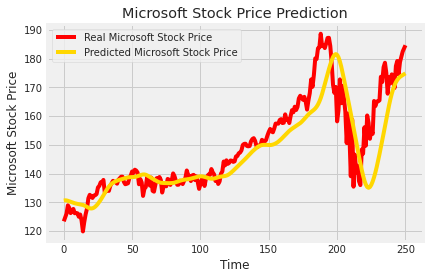

In [65]:
valid = data[training_data_len:]
real_price = valid.iloc[:, 0:1].values
plt.plot(real_price, color = 'red', label = 'Real Microsoft Stock Price')
plt.plot(msft_pred, color = 'gold', label = 'Predicted Microsoft Stock Price')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


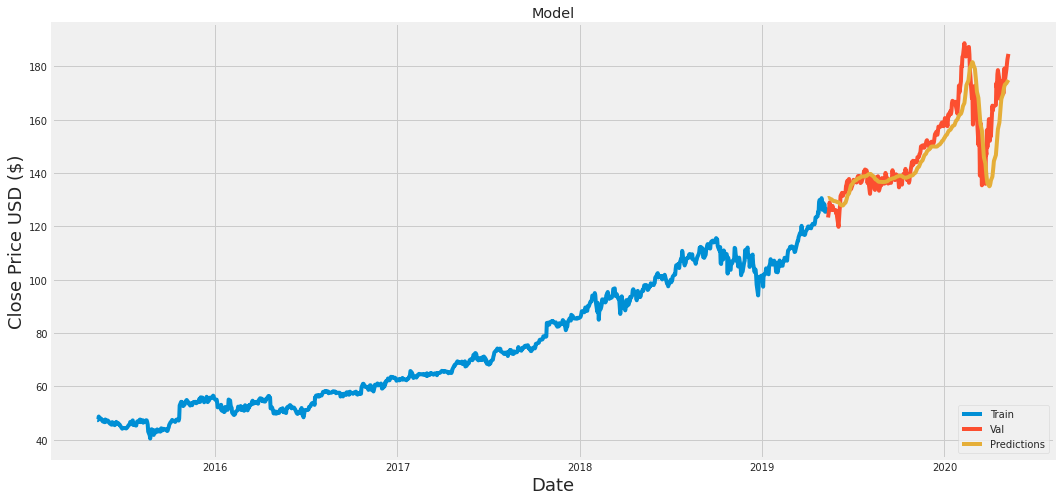

In [66]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = msft_pred
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [67]:
valid

,Close,Predictions
Date,,
2019-05-13,123.349998,130.590317
2019-05-14,124.730003,130.668350
2019-05-15,126.019997,130.631836
2019-05-16,128.929993,130.504166
2019-05-17,128.070007,130.330017
...,...,...
2020-05-04,178.839996,173.662277
2020-05-05,180.759995,174.011093
2020-05-06,182.539993,174.300552


In [68]:
rmse_msft = np.sqrt(np.mean(((msft_pred- msft_y_test) ** 2)))
rmse_msft

8.317891774988347

**Amazon Price**

In [69]:
data = AMZN.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .8 ))
scaler = MinMaxScaler(feature_range=(0,1))
scaled_amzn = scaler.fit_transform(dataset)
scaled_amzn

array([[0.00542809],
       [0.00453639],
       [0.00251427],
       ...,
       [0.94019364],
       [0.9481604 ],
       [0.95400753]])

In [70]:
train_data = scaled_amzn[0:int(training_data_len), :]
amzn_x_train = []
amzn_y_train = []

for i in range(60, len(train_data)):
    amzn_x_train.append(train_data[i-60:i, 0])
    amzn_y_train.append(train_data[i, 0])
# Convert the x_train and y_train to numpy arrays 
amzn_x_train, amzn_y_train = np.array(amzn_x_train), np.array(amzn_y_train)
#Reshape the data
amzn_x_train = np.reshape(amzn_x_train, (amzn_x_train.shape[0], amzn_x_train.shape[1], 1))
print(amzn_x_train.shape, amzn_y_train.shape)

(948, 60, 1) (948,)


In [71]:
# RNN
regressor = Sequential()

# Adding a LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (amzn_x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, activation = 'relu'))
regressor.add(Dropout(0.2))
 
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(aapl_x_train, aapl_y_train, epochs = 5, batch_size = 6)

Epoch 1/5
948/948 [==============================] - 18s 19ms/step - loss: 0.0086
Epoch 2/5
948/948 [==============================] - 17s 18ms/step - loss: 0.0027
Epoch 3/5
948/948 [==============================] - 17s 18ms/step - loss: 0.0019
Epoch 4/5
948/948 [==============================] - 17s 18ms/step - loss: 0.0019
Epoch 5/5
948/948 [==============================] - 17s 18ms/step - loss: 0.0021


In [0]:
#create test data set
test_data = scaled_amzn[training_data_len - 60: , :]
#Create the data sets x_test and y_test
amzn_x_test = []
amzn_y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    amzn_x_test.append(test_data[i-60:i, 0])
# Convert the data to a numpy array
amzn_x_test = np.array(amzn_x_test)
amzn_x_test = np.reshape(amzn_x_test, (amzn_x_test.shape[0], amzn_x_test.shape[1], 1 ))
amzn_pred = regressor.predict(amzn_x_test)
amzn_pred = scaler.inverse_transform(amzn_pred)

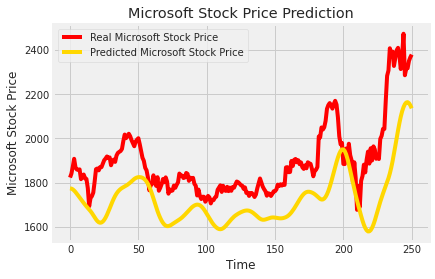

In [73]:
valid = data[training_data_len:]
real_price = valid.iloc[:, 0:1].values
plt.plot(real_price, color = 'red', label = 'Real Microsoft Stock Price')
plt.plot(amzn_pred, color = 'gold', label = 'Predicted Microsoft Stock Price')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


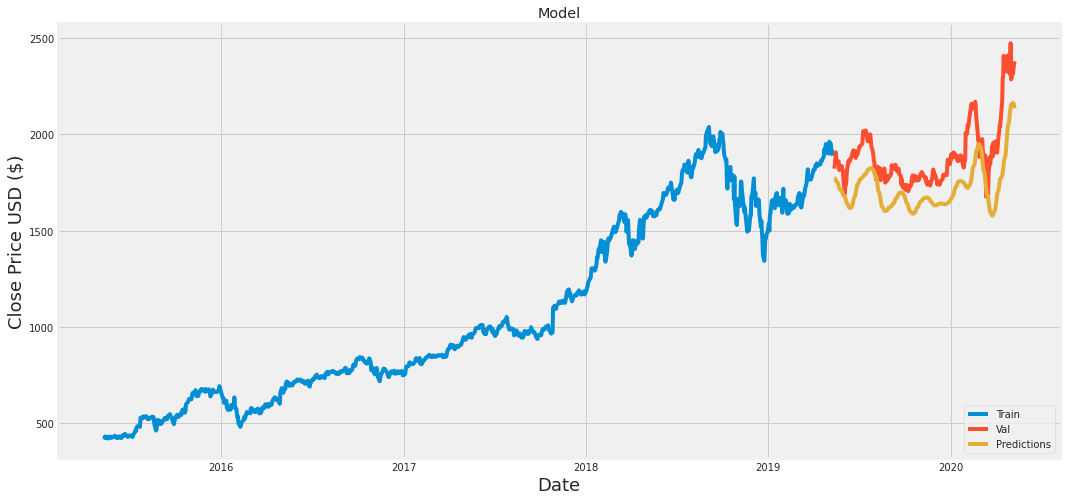

In [74]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = amzn_pred
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [75]:
valid

,Close,Predictions
Date,,
2019-05-13,1822.680054,1773.744141
2019-05-14,1840.119995,1772.677490
2019-05-15,1871.150024,1769.290405
2019-05-16,1907.569946,1763.789307
2019-05-17,1869.000000,1756.901245
...,...,...
2020-05-04,2315.989990,2162.609863
2020-05-05,2317.800049,2164.130859
2020-05-06,2351.260010,2159.664062


In [76]:
rmse_amzn = np.sqrt(np.mean(((amzn_pred- amzn_y_test) ** 2)))
rmse_amzn

198.13551769474668